In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SyntaxError: source code string cannot contain null bytes (<string>)

In [2]:
# Load the dataset
file_path = 'daraz.csv'
ecommerce_data = pd.read_csv(file_path)

In [3]:
# Clean and preprocess the data
# Clean the price column by removing currency symbols and converting to numeric
ecommerce_data['price_clean'] = ecommerce_data['price'].str.replace(r'[^\d]', '', regex=True).astype(float)

In [8]:
# Remove duplicate product entries
ecommerce_data = ecommerce_data.drop_duplicates(subset='name', keep='first')

In [4]:
# Add a 'brand' column 
ecommerce_data['brand'] = ecommerce_data['name'].str.split().str[0].str.lower()

In [5]:
#Basic Statistics
average_price = ecommerce_data['price_clean'].mean()
median_price = ecommerce_data['price_clean'].median()
min_price = ecommerce_data['price_clean'].min()
max_price = ecommerce_data['price_clean'].max()

In [11]:
print(f"Average Price: {average_price}")
print(f"Median Price: {median_price}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Average Price: 43575.79775280899
Median Price: 29249.5
Minimum Price: 250.0
Maximum Price: 334999.0


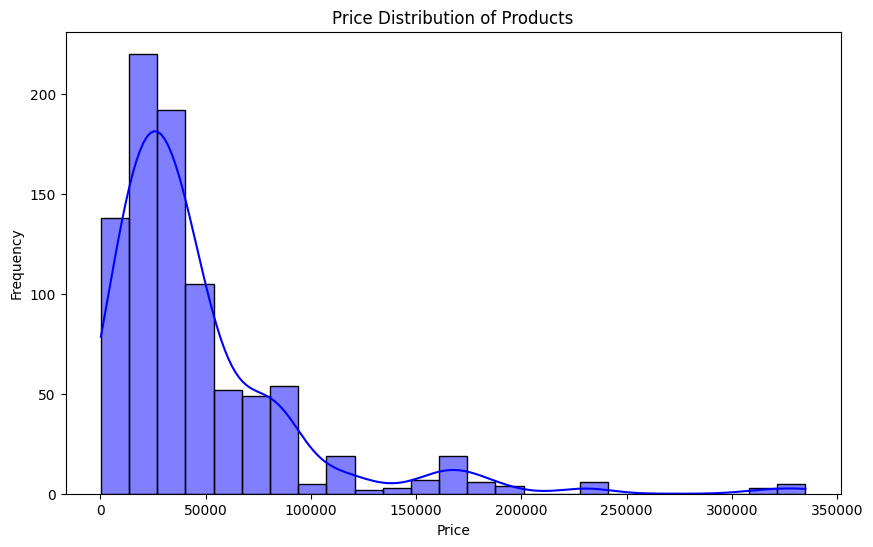

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(ecommerce_data['price_clean'], kde=True, color='blue', bins=25)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4356\3878411123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')


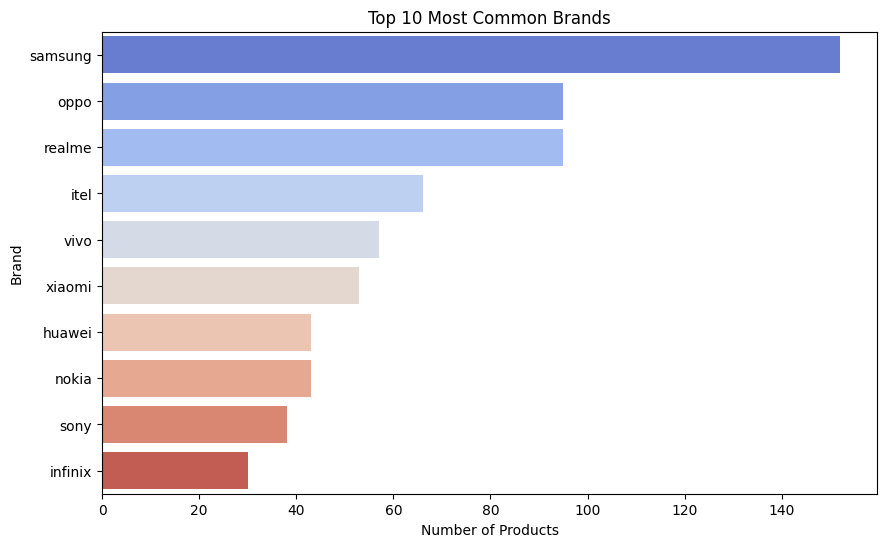

In [11]:
top_brands = ecommerce_data['brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top 10 Most Common Brands')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.show()

In [12]:
most_expensive = ecommerce_data.nlargest(5, 'price_clean')
print("Top 5 Most Expensive Products:")
print(most_expensive[['name', 'price_clean']])

Top 5 Most Expensive Products:
                                                  name  price_clean
487  Samsung Galaxy Z Fold 3 ( 5G )  8GB Ram 256GB ...     334999.0
488  Samsung Galaxy Z Fold 3 ( 5G )  8GB Ram 256GB ...     334999.0
489  Samsung Galaxy Z Fold 3 ( 5G )  8GB Ram 256GB ...     334999.0
490  Samsung Galaxy Z Fold 3 ( 5G )  8GB Ram 256GB ...     334999.0
430                        Samsung Galaxy S22 Ultra ||     324999.0


In [14]:
bins = [0, 5000, 20000, 50000, 100000, np.inf]
labels = ['Low', 'Mid-Low', 'Mid-High', 'High', 'Luxury']
ecommerce_data['price_range'] = pd.cut(ecommerce_data['price_clean'], bins=bins, labels=labels)


C:\Users\HP\AppData\Local\Temp\ipykernel_4356\1867219899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='coolwarm')


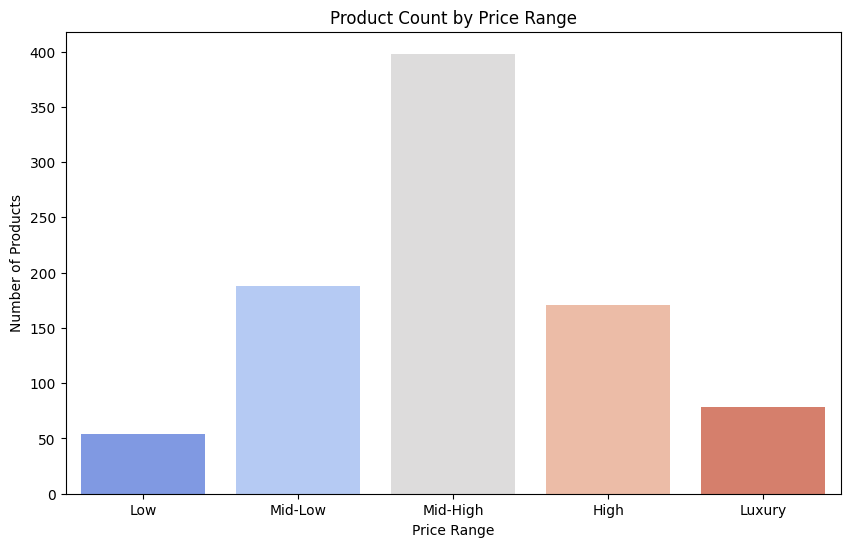

In [17]:
price_range_counts = ecommerce_data['price_range'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='coolwarm')
plt.title('Product Count by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.show()